## PROBLEM STATEMENT

 X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study

1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
## IMPORT WARNING 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd 
import scipy
import sklearn
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics


In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

#### Reading the CSV file, and understandind the dataset

In [4]:
Leads=pd.read_csv("Leads.csv")

In [5]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
Leads.shape

(9240, 37)

In [7]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
Leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

## DATA CLEANING 

In [10]:
Leads.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
# Droping columns with more than 30% nulls values
Leads = Leads.drop(Leads.loc[:,list((100*(Leads.isnull().sum()/len(Leads.index))>30))].columns, 1)
Leads.shape

(9240, 31)

In [12]:
Leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
## REMOVING UNWANTED COLUMN
unwanted_columns=["Prospect ID",'Lead Number','Do Not Email', 'Do Not Call','Country','How did you hear about X Education', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','Update me on Supply Chain Content','City', 'I agree to pay the amount through cheque','Receive More Updates About Our Courses', 'Get updates on DM Content']

In [14]:
Leads.drop(unwanted_columns,axis=1,inplace=True)

In [15]:
Leads.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
Leads.shape

(9240, 12)

## IMPUTATION 

In [17]:
# converting Select to np.nan
Leads=Leads.replace("Select",np.nan)    

In [18]:
round(Leads.isna().sum()*100/len(Leads),2)

Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
Lead Profile                              74.19
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [19]:
## checking uniqueness in categorical variable

In [20]:
Leads.dtypes 

Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Lead Profile                               object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [21]:
Leads["Specialization"]=Leads["Specialization"].replace(np.nan,"Unspecified") ## replacing null values with unspecified

In [22]:
Leads["Specialization"].value_counts()

Unspecified                          3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [23]:
Leads["Specialization"]=Leads["Specialization"].replace(["International Business","E-Business"],"Business")
Leads["Specialization"]=Leads["Specialization"].replace(["Finance Management","Human Resource Management","Marketing Management","Operations Management","IT Projects Management","Supply Chain Management","Healthcare Management","Hospitality Management","Retail Management"],"Management")

In [24]:
Leads["Specialization"].value_counts()

Management                           4253
Unspecified                          3380
Business Administration               403
Banking, Investment And Insurance     338
Business                              235
Media and Advertising                 203
Travel and Tourism                    203
E-COMMERCE                            112
Rural and Agribusiness                 73
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
Leads["Lead Source"]=Leads["Lead Source"].replace({"google":"Google","Facebook":"Social Media"})   ### Merging the Categories in the columns
Leads["Lead Source"]=Leads["Lead Source"].replace(["blog","Pay per Click Ads","Live Chat","bing","Click2call","Press_Release","youtubechannel","WeLearn","welearnblog_Home","testone","NC_EDM"],"others")

In [26]:
Leads["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
others                21
Name: Lead Source, dtype: int64

In [27]:
Leads["Lead Profile"].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [28]:
Leads["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [29]:
Leads["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [30]:
Leads["Last Activity"]=Leads["Last Activity"].replace(["Unreachable","Unsubscribed","Had a Phone Conversation","Approached upfront","View in browser link Clicked","Email Received","Email Marked Spam","Visited Booth in Tradeshow","Resubscribed to emails"],"others")

In [31]:
Leads["Last Activity"].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [32]:
Leads["Last Notable Activity"]=Leads["Last Notable Activity"].replace(["Email Bounced","Unsubscribed","Unreachable","Had a Phone Conversation","Email Marked Spam","Approached upfront","Resubscribed to emails","View in browser link Clicked","Email Received","Form Submitted on Website"],"others")

In [33]:
Leads["Last Notable Activity"].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
others                      160
Name: Last Notable Activity, dtype: int64

#### IMPUTING CATEGORICAL COLUMN

In [34]:
Leads.isna().sum()

Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                               0
What is your current occupation           2690
Lead Profile                              6855
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [35]:
Leads['Lead Source'].value_counts(normalize=True) 

Google              0.312147
Direct Traffic      0.276293
Olark Chat          0.190678
Organic Search      0.125380
Reference           0.058018
Welingak Website    0.015428
Referral Sites      0.013581
Social Media        0.006193
others              0.002282
Name: Lead Source, dtype: float64

In [36]:
Leads['Lead Source']=Leads['Lead Source'].fillna(Leads['Lead Source'].mode()[0])


In [37]:
Leads['Lead Source'].value_counts(normalize=True) 

Google              0.314827
Direct Traffic      0.275216
Olark Chat          0.189935
Organic Search      0.124892
Reference           0.057792
Welingak Website    0.015368
Referral Sites      0.013528
Social Media        0.006169
others              0.002273
Name: Lead Source, dtype: float64

In [38]:
Leads['Last Activity'].value_counts(normalize=True) 

Email Opened                 0.376163
SMS Sent                     0.300427
Olark Chat Conversation      0.106490
Page Visited on Website      0.070045
Converted to Lead            0.046843
Email Bounced                0.035679
Email Link Clicked           0.029222
others                       0.022436
Form Submitted on Website    0.012696
Name: Last Activity, dtype: float64

In [39]:
Leads['Last Activity']=Leads['Last Activity'].fillna(Leads['Last Activity'].mode()[0]) 

In [40]:
Leads['What is your current occupation']=Leads['What is your current occupation'].fillna(Leads['What is your current occupation'].mode()[0])

In [41]:
Leads.isna().sum()

Lead Origin                                  0
Lead Source                                  0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                                0
Specialization                               0
What is your current occupation              0
Lead Profile                              6855
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [42]:
Leads["Lead Profile"]=Leads["Lead Profile"].replace(np.nan,"unspecified")

In [43]:
Leads.isna().sum()*100/len(Leads)

Lead Origin                               0.000000
Lead Source                               0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             0.000000
Specialization                            0.000000
What is your current occupation           0.000000
Lead Profile                              0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [44]:
Leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [45]:
Leads['TotalVisits'].fillna(Leads['TotalVisits'].median(),inplace=True)

In [46]:
Leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [47]:
Leads['Page Views Per Visit'].fillna(Leads['Page Views Per Visit'].median(),inplace=True)

In [48]:
Leads.isna().sum()*100/len(Leads) ## CHECKING FOR NULL VALUES

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Lead Profile                              0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [49]:
## getting list of category and numrical column
numerical_data=Leads.select_dtypes(include=[np.number])

In [50]:
## getting list of category and numrical column
category_data = Leads.select_dtypes(exclude=[np.number])      


## EDA

### UNIVARIATE ANALYSIS

In [51]:
#### EDA ON CATEGORICAL COLUMNS

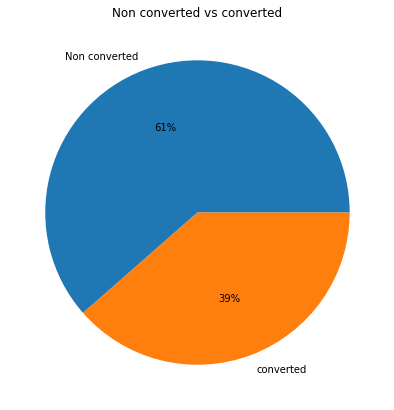

In [52]:
Leads['Converted'].value_counts(normalize=True)*100

plt.figure(figsize=(10,7))
plt.pie(Leads['Converted'].value_counts().values
,labels=["Non converted","converted" ], autopct='%1.f%%')

plt.title('Non converted vs converted')

plt.show()

#### observation :  
61% are converted and 39% non converted

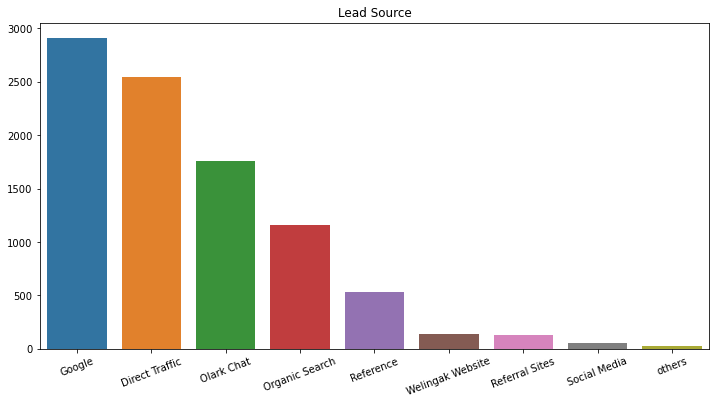

In [53]:
plt.figure(figsize=(12,6))
plt.title('Lead Source')

#define data
height = Leads['Lead Source'].value_counts().values
x= Leads['Lead Source'].value_counts().index
#create bar graph
sns.barplot(x,height,data=Leads)
plt.xticks( rotation=21)
plt.show()

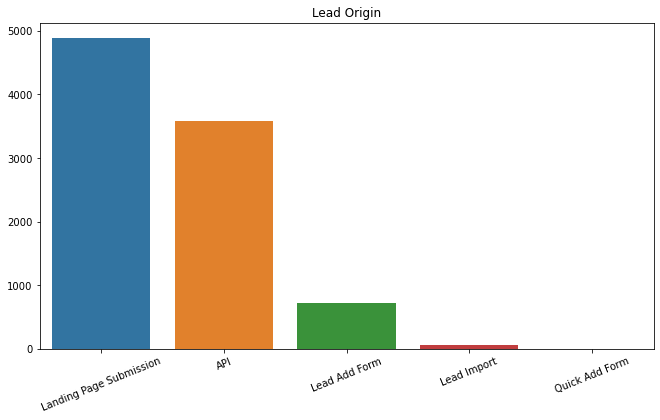

In [54]:
plt.figure(figsize=(11,6))
plt.title('Lead Origin')

#define data
height = Leads['Lead Origin'].value_counts().values
x= Leads['Lead Origin'].value_counts().index
#create bar graph
sns.barplot(x,height,data=Leads)
plt.xticks( rotation=22)
plt.show()

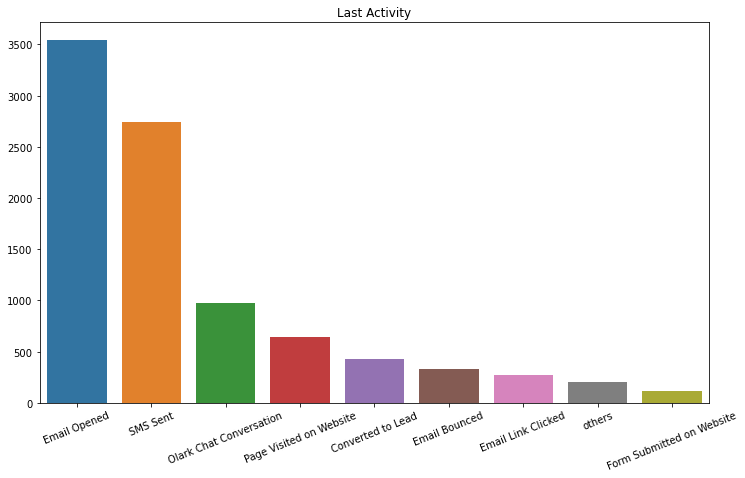

In [55]:
plt.figure(figsize=(12,7))
plt.title('Last Activity')

#define data
height = Leads['Last Activity'].value_counts().values
x= Leads['Last Activity'].value_counts().index
#create bar graph
sns.barplot(x,height,data=Leads)
plt.xticks( rotation=22)
plt.show()

## observation : 
Email opened followed by SMS are usually performed by the customer. 

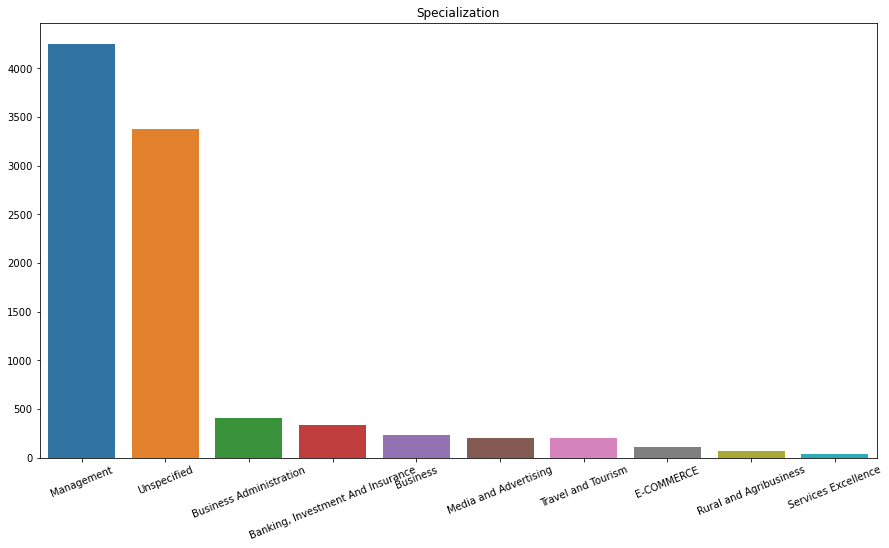

In [56]:
plt.figure(figsize=(15,8))
plt.title('Specialization')

#define data
height = Leads['Specialization'].value_counts().values
x= Leads['Specialization'].value_counts().index
#create bar graph
sns.barplot(x,height,data=Leads)
plt.xticks( rotation=22)
plt.show()


### Observation :
Most of the customer are from management followed by those who are not willing to specify their      specialization.

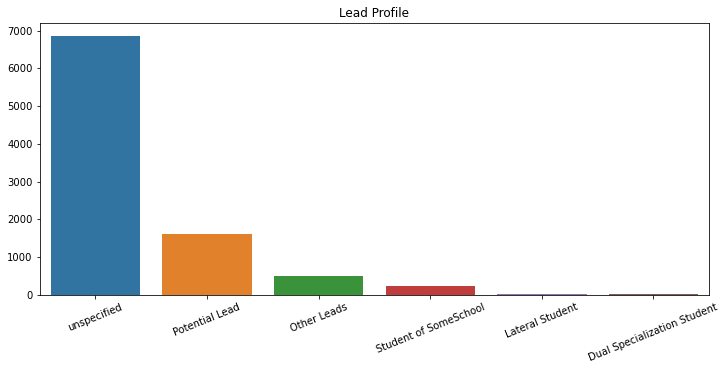

In [57]:
plt.figure(figsize=(12,5))
plt.title('Lead Profile')

#define data
height = Leads['Lead Profile'].value_counts().values
x= Leads['Lead Profile'].value_counts().index
#create bar graph
sns.barplot(x,height,data=Leads)
plt.xticks( rotation=22)
plt.show()

#### OBSERVATION :
MOST OF THE LEAD PROFILE IS UNSPECIFIED.

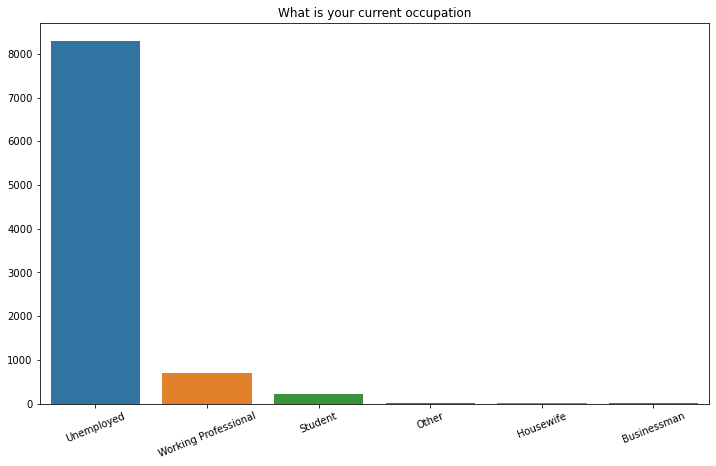

In [58]:
plt.figure(figsize=(12,7))
plt.title('What is your current occupation')

#define data
height =Leads['What is your current occupation'].value_counts().values
x= Leads['What is your current occupation'].value_counts().index
#create bar graph
sns.barplot(x,height,data=Leads)
plt.xticks( rotation=22)
plt.show()

#### OBSERVATION : 
1.MAJORITY ARE UNEMPLOYED.

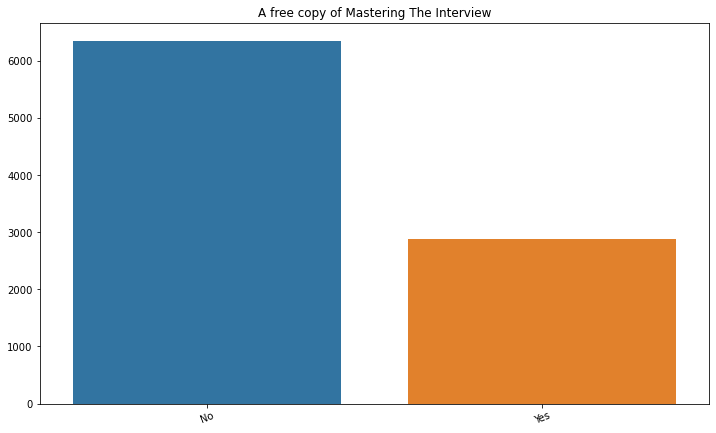

In [59]:
plt.figure(figsize=(12,7))
plt.title('A free copy of Mastering The Interview')

#define data
height = Leads['A free copy of Mastering The Interview'].value_counts().values
x= Leads['A free copy of Mastering The Interview'].value_counts().index
#create bar graph
sns.barplot(x,height,data=Leads)
plt.xticks( rotation=22)
plt.show()

 #### observation : 
Most of the customer don't wants a free copy of 'Mastering the Interview'.

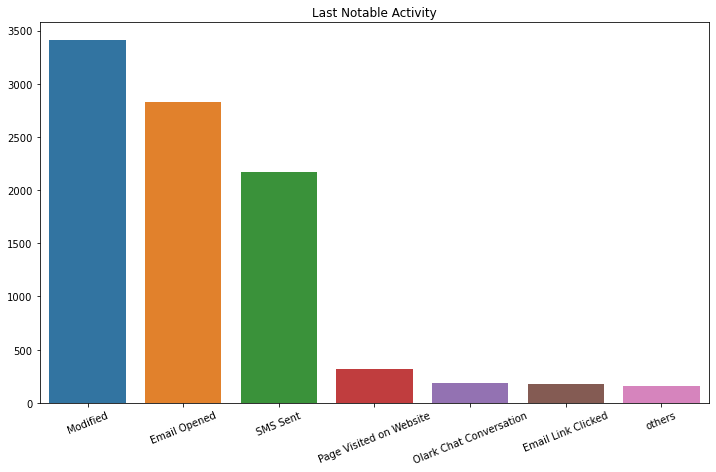

In [60]:
plt.figure(figsize=(12,7))
plt.title("Last Notable Activity")

#define data
height = Leads["Last Notable Activity"].value_counts().values
x= Leads["Last Notable Activity"].value_counts().index
#create bar graph
sns.barplot(x,height,data=Leads)
plt.xticks( rotation=22)
plt.show()

### Observation
    1.The Modified activities are seen at last which are generally more than others .`

### NUMERICAL COLUMNS

### OUTLIER TREATMENT

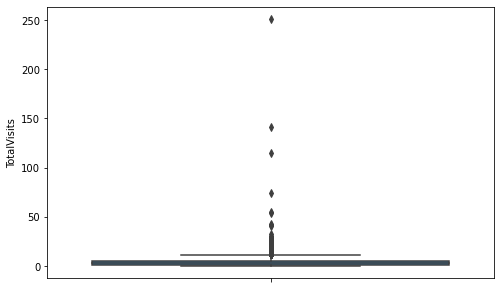

In [61]:
plt.figure(figsize=(8,5))
sns.boxplot(y=Leads['TotalVisits'])
plt.show()



## we can see outlier in above plot

In [62]:
Leads['TotalVisits'].describe(percentiles=[0.05,.25, .50, .75, .90, .95, .99])


count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

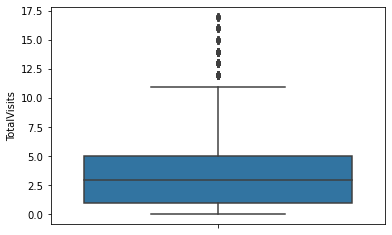

In [63]:
Q3 = Leads.TotalVisits.quantile(0.99)
Leads = Leads[(Leads.TotalVisits <= Q3)]
Q1 = Leads.TotalVisits.quantile(0.01)
Leads = Leads[(Leads.TotalVisits >= Q1)]
sns.boxplot(y=Leads['TotalVisits'])
plt.show()

In [64]:
## checking for next column
Leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9157.000000
mean      486.189036
std       547.695908
min         0.000000
5%          0.000000
25%        10.000000
50%       247.000000
75%       933.000000
90%      1379.000000
95%      1559.400000
99%      1839.440000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

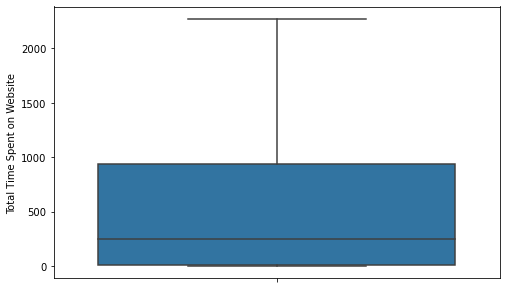

In [65]:

plt.figure(figsize=(8,5))
sns.boxplot(y=Leads['Total Time Spent on Website'])
plt.show()

#### No outlier present 

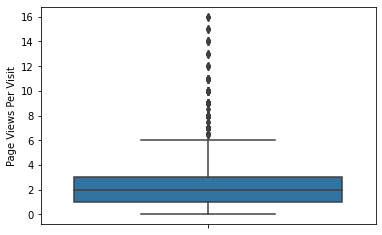

In [66]:
## checking for next column
plt.figure(figsize=(6,4))
sns.boxplot(y=Leads['Page Views Per Visit'])
plt.show()

In [67]:
Leads['Page Views Per Visit'].describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

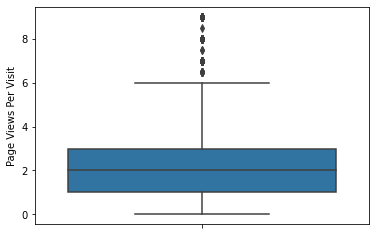

In [68]:
Q3 = Leads['Page Views Per Visit'].quantile(0.99)
Leads = Leads[(Leads['Page Views Per Visit'] <= Q3)]
Q1 = Leads['Page Views Per Visit'].quantile(0.01)
Leads = Leads[(Leads['Page Views Per Visit'] >= Q1)]
sns.boxplot(y=Leads['Page Views Per Visit'])
plt.show()

# Bivariate Analysis

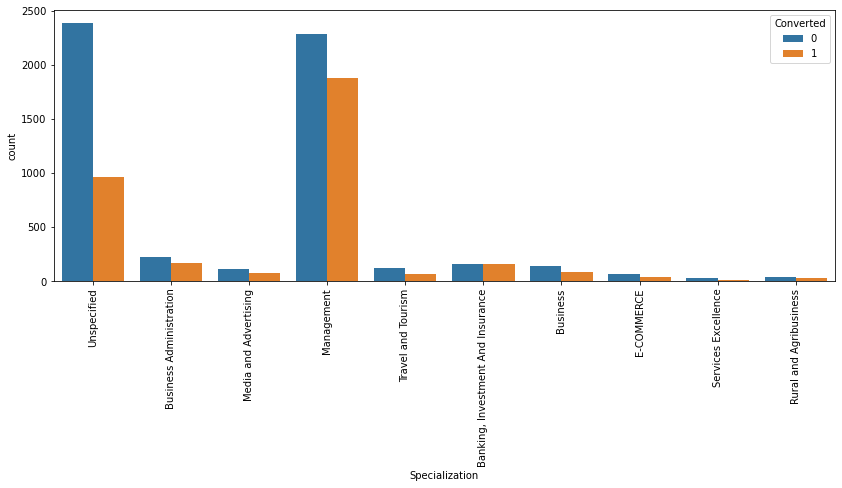

In [69]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Specialization", hue = "Converted", data = Leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

### Observation
    1.The management specialized professionals are higher chances of getting converted as compare to others.

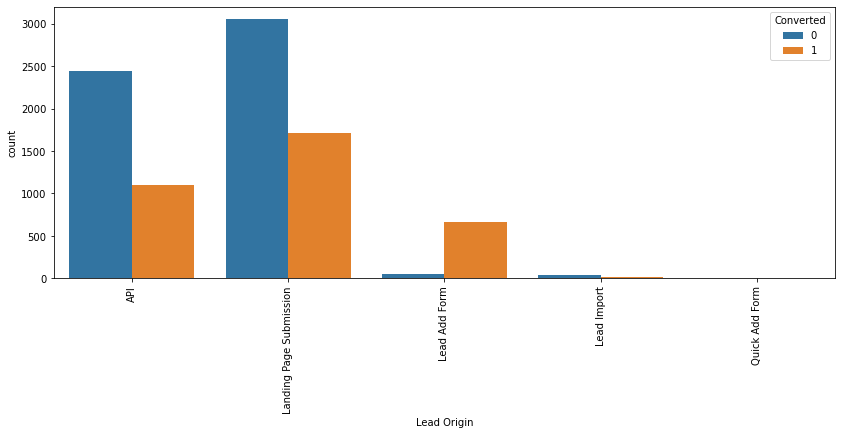

In [70]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Lead Origin", hue = "Converted", data = Leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

### Observation
    1.The Landing page Sumbission are more converting in numbers
    2.The point to be noted that the Lead Add form have the high coversion rate as others .

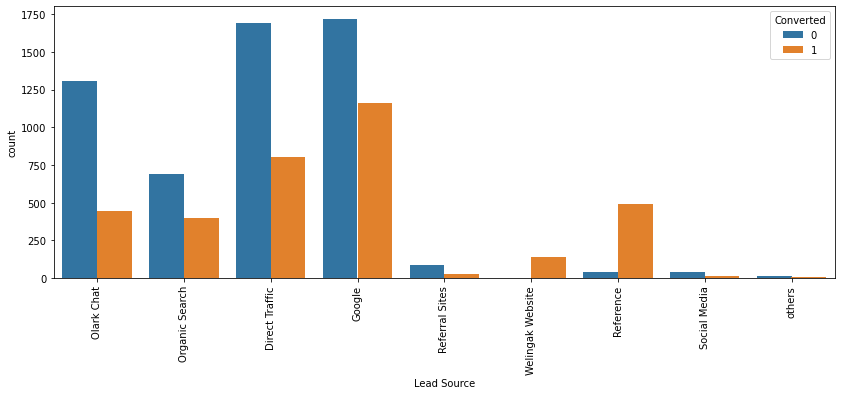

In [71]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Lead Source", hue = "Converted", data = Leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

### Observation
    1.Direct traffic, Google and Reference have high chance of lead to be converted.

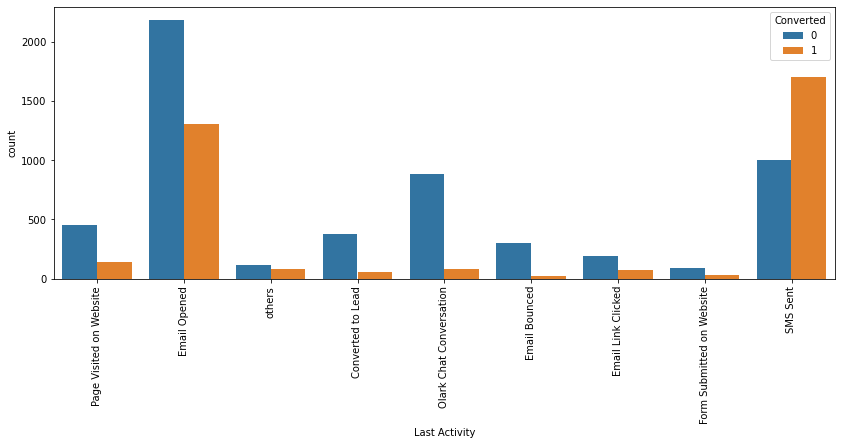

In [72]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Activity", hue = "Converted", data = Leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

### Observation
    1.The SMS sent has high conversion rate than non conversion while in other cases non conversion rate is more than conversion.

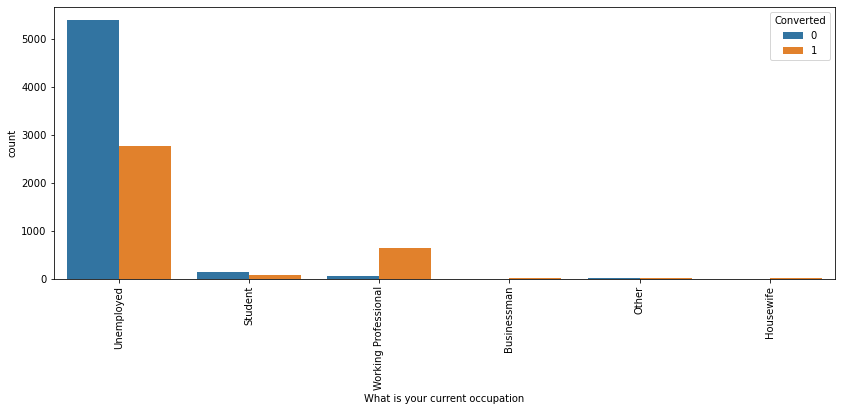

In [73]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "What is your current occupation", hue = "Converted", data = Leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

### Observation
    1. working professional are low in number but they have the high conversion rate 
    2.Unemployed are more in number but there non conversion rate is high as compared to conversion. 

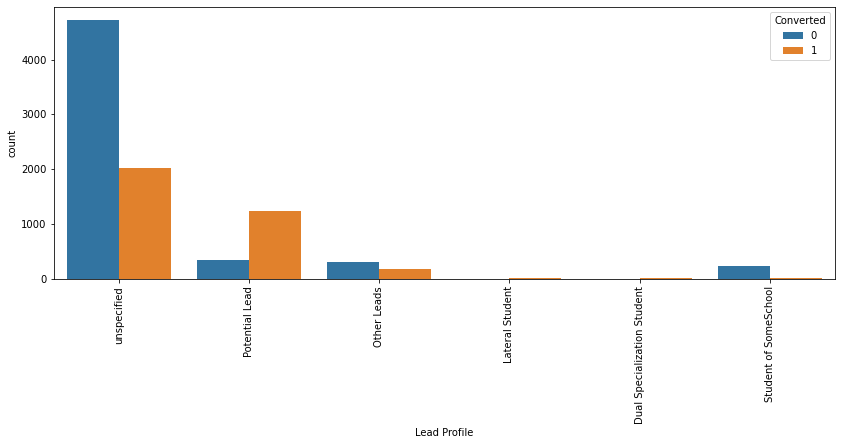

In [74]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Lead Profile", hue = "Converted", data = Leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

### Observation
    1.The potential lead are less in number but have high conversion rate although unspecified are more converting .

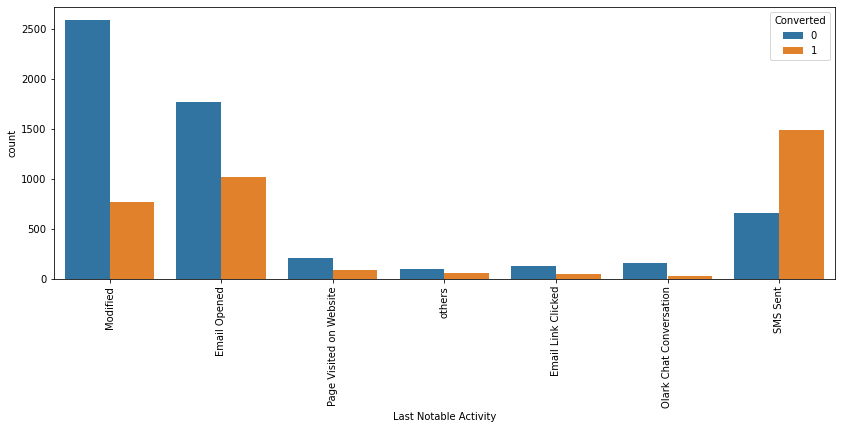

In [75]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

#### observation : 

SMS sent have high conversion rate.

In [76]:
## NUMRICAL COLUMN

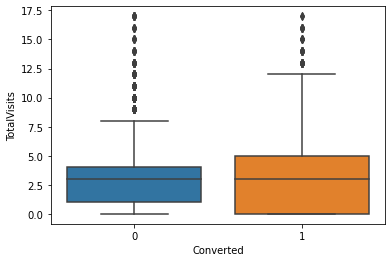

In [77]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Leads)
plt.show()

## Observation 
Both have almost close median value

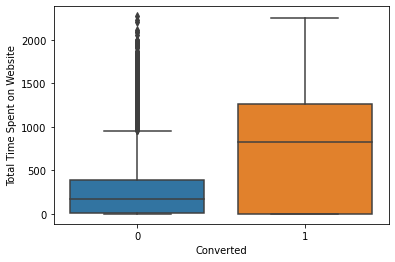

In [78]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Leads)
plt.show()

### Observation
    
    1. leads spending more time on the website are more likely to be converted

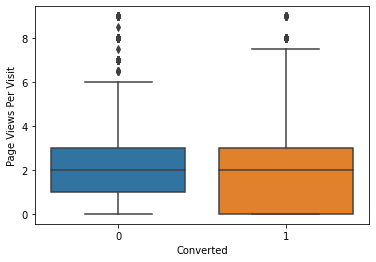

In [79]:

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = Leads)
plt.show()

### Observation
    1.The median value are almost same for the converted and not converted.

## MULTIVARIATE ANALYSIS

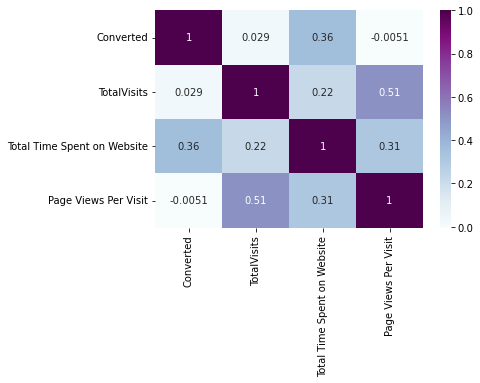

In [80]:
sns.heatmap(numerical_data.corr(),cmap="BuPu",annot=True);

 "the pages per visit" and "Total visits" are highly correlated as compated to other variables.

<Figure size 576x576 with 0 Axes>

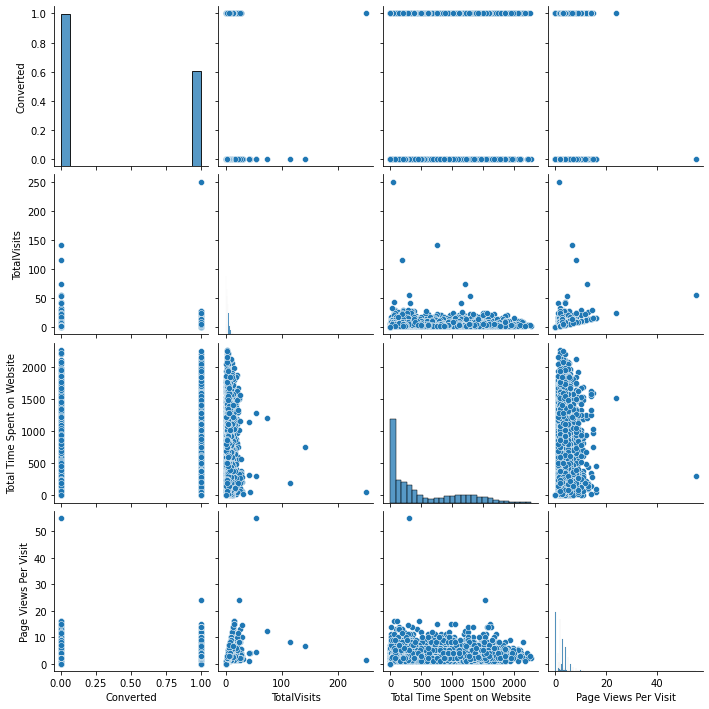

In [81]:
plt.figure(figsize=(8,8))
sns.pairplot(numerical_data);

## DATA PREPARATION

In [82]:
# Creating Dummies for the categorical columns 
dummy=pd.get_dummies(Leads[["Lead Origin","Lead Source","Specialization","Last Activity","What is your current occupation","Lead Profile","Last Notable Activity"]],drop_first=True)

In [83]:
# Droping those variable for which we have created Dummies.
Leads.drop(["Lead Origin","Lead Source","Specialization","Last Activity","What is your current occupation","Lead Profile","Last Notable Activity"],axis=1,inplace=True)

In [84]:
Leads["A free copy of Mastering The Interview"].replace({"Yes":0,"No":1},inplace=True) ### Converting categorical to the numerical column.

In [85]:
Leads=pd.concat([Leads,dummy],axis=1)

In [86]:
Leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unspecified,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_others
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [87]:
Leads.shape   

(9090, 50)

In [88]:
y=Leads["Converted"]
X=Leads.drop(["Converted"],axis=1)

In [89]:
#  Splitting the Data into Training and Testing Sets

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)


#### Scaling of Data 

In [90]:
scaler=StandardScaler()

In [91]:
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unspecified,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_others
302,1.336782,-0.428736,0.044021,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
6087,-1.094877,-0.887355,-1.206716,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1033,0.642022,-0.025151,1.477269,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
7656,0.989402,-0.241619,2.014065,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3241,0.294642,0.897591,-0.492776,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [92]:
### Checking the Converted Rate
Converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
Converted

38.448844884488445

### <i> MODEL BUILDING </i>

In [93]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())   # Using the stats model adding the constant and using the family group as Binomial  which is already imported above.
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2382.2
Date:                Sat, 21 Jan 2023   Deviance:                       4764.4
Time:                        18:15:33   Pearson chi2:                 7.45e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4406
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.7798   2.14e+04      0.001      0.999   -4.19e+04     4.2e+04
TotalVisits                                              0.2441      0.053      4.592      0.000       0.140       0.348
Total Time Spent on Website                              1.0776      0.042     25.488      0.000       0.995       1.160
Page Views Per Visit                                    -0.2026      0.060     -3.370      0.001      -0.320      -0.085
A free copy of Mastering The Interview                   0.0745      0.116      0.644      0.520      -0.152       0.301
Lead Origin_Landing Page Submission                     -0.4006      0.151     -2.656      0.008      -0.696      -0.105
Lead Origin_Lead Add Form                                3.4712      0.710      4.892      0.000       2.080       4.862
Lead Origin_Lead Import                                 -0.1077      1.485     -0.073      0.942      -3.019       2.803
Lead Origin_Quick Add Form                              23.2735   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                       0.3502      0.121      2.885      0.004       0.112       0.588
Lead Source_Olark Chat                                   1.3276      0.174      7.636      0.000       0.987       1.668
Lead Source_Organic Search                               0.0288      0.140      0.206      0.837      -0.245       0.303
Lead Source_Reference                                   -0.4190      0.740     -0.566      0.571      -1.870       1.032
Lead Source_Referral Sites                               0.3928      0.351      1.119      0.263      -0.295       1.081
Lead Source_Social Media                                 0.1969      1.389      0.142      0.887      -2.526       2.919
Lead Source_Welingak Website                             3.2504      1.234      2.635      0.008       0.833       5.668
Lead Source_others                                       0.9128      0.856      1.067      0.286      -0.765       2.590
Specialization_Business                                 -0.0908      0.290     -0.313      0.754      -0.659       0.477
Specialization_Business Administration                  -0.3442      0.256     -1.346      0.178      -0.845       0.157
Specialization_E-COMMERCE                                0.3479      0.383      0.908      0.364      -0.403       1.099
Specialization_Management                               -0.0098      0.199     -0.049      0.961      -0.399       0.380
Specialization_Media and Advertising                    -0.1739      0.311     -0.560      0.576      -0.783       0.435
Specialization_Rural and Agribusiness                    0

In [94]:
### Already Imported the logistic Regression so we are calling the Logistic Regression for model building .
logreg = LogisticRegression()  

In [95]:
rfe = RFE(logreg, n_features_to_select=18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [96]:
rfe.support_  

array([False,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True,  True])

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))  

[('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('A free copy of Mastering The Interview', False, 24),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Origin_Quick Add Form', False, 12),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Reference', False, 25),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Social Media', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_others', False, 3),
 ('Specialization_Business', False, 28),
 ('Specialization_Business Administration', False, 13),
 ('Specialization_E-COMMERCE', False, 8),
 ('Specialization_Management', False, 31),
 ('Specialization_Media and Advertising', False, 22),
 ('Specialization_Rural and Agribusiness', False, 17),
 ('Specialization_Services Excellence', Fals

In [98]:
col = X_train.columns[rfe.support_]                           
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool', 'Lead Profile_unspecified',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_others'],
      dtype='object')

In [99]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_others', 'Specialization_Business',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Specialization_Unspecified',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_others',
       'What is your current occupation_Other', 'Lead Profile_Other Leads',
       'Last Notable Activit

### Model 2

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2431.9
Date:                Sat, 21 Jan 2023   Deviance:                       4863.9
Time:                        18:15:38   Pearson chi2:                 7.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4318
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7709      0.652     -1.182      0.237      -2.049       0.507
Total Time Spent on Website                              1.0971      0.042     26.429      0.000       1.016       1.178
Lead Origin_Lead Add Form                                3.1474      0.205     15.378      0.000       2.746       3.549
Lead Source_Olark Chat                                   1.2905      0.109     11.820      0.000       1.077       1.505
Lead Source_Welingak Website                             3.4968      1.028      3.401      0.001       1.482       5.512
Last Activity_Email Bounced                             -1.9430      0.358     -5.426      0.000      -2.645      -1.241
Last Activity_Email Opened                               0.6344      0.111      5.692      0.000       0.416       0.853
Last Activity_Olark Chat Conversation                   -0.7976      0.189     -4.221      0.000      -1.168      -0.427
Last Activity_SMS Sent                                   0.7276      0.168      4.325      0.000       0.398       1.057
What is your current occupation_Housewife               22.0691   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Student                 -0.3496      0.706     -0.495      0.620      -1.732       1.033
What is your current occupation_Unemployed              -1.0146      0.650     -1.560      0.119      -2.290       0.260
What is your current occupation_Working Professional     1.3927      0.674      2.065      0.039       0.071       2.715
Lead Profile_Lateral Student                             2.3601      1.120      2.107      0.035       0.164       4.556
Lead Profile_Potential Lead                              1.3325      0.173      7.683      0.000       0.993       1.672
Lead Profile_Student of SomeSchool                      -2.6272      0.476     -5.518      0.000      -3.560      -1.694
Lead Profile_unspecified                                -0.5783      0.156     -3.712      0.000      -0.884      -0.273
Last Notable Activity_SMS Sent                           1.4370      0.153      9.367      0.000       1.136       1.738
Last Notable Activity_others                             1.4703      0.301      4.886      0.000       0.881       2.060
========================================================================================================================
"""

In [101]:
#verifying the VIF values for the Feature Variables
# Already imported the Variance Inflation Factor 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,20.42
15,Lead Profile_unspecified,15.50
7,Last Activity_SMS Sent,6.58
16,Last Notable Activity_SMS Sent,4.81
13,Lead Profile_Potential Lead,4.41
5,Last Activity_Email Opened,3.28
11,What is your current occupation_Working Profes...,2.73
6,Last Activity_Olark Chat Conversation,1.94
2,Lead Source_Olark Chat,1.78
14,Lead Profile_Student of SomeSchool,1.64


In [102]:
col = col.drop(['What is your current occupation_Housewife'])

## MODEL 3

In [103]:
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm3_model = logm3.fit()
logm3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2434.9
Date:                Sat, 21 Jan 2023   Deviance:                       4869.8
Time:                        18:15:38   Pearson chi2:                 7.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0617      0.572     -0.108      0.914      -1.183       1.060
Total Time Spent on Website                              1.0956      0.041     26.412      0.000       1.014       1.177
Lead Origin_Lead Add Form                                3.1516      0.204     15.414      0.000       2.751       3.552
Lead Source_Olark Chat                                   1.2876      0.109     11.797      0.000       1.074       1.502
Lead Source_Welingak Website                             3.4899      1.028      3.395      0.001       1.475       5.505
Last Activity_Email Bounced                             -1.9407      0.358     -5.420      0.000      -2.642      -1.239
Last Activity_Email Opened                               0.6384      0.111      5.734      0.000       0.420       0.857
Last Activity_Olark Chat Conversation                   -0.7985      0.189     -4.224      0.000      -1.169      -0.428
Last Activity_SMS Sent                                   0.7291      0.168      4.335      0.000       0.399       1.059
What is your current occupation_Student                 -1.0619      0.635     -1.673      0.094      -2.306       0.182
What is your current occupation_Unemployed              -1.7271      0.573     -3.015      0.003      -2.850      -0.604
What is your current occupation_Working Professional     0.6801      0.600      1.134      0.257      -0.495       1.855
Lead Profile_Lateral Student                             2.3594      1.120      2.106      0.035       0.164       4.555
Lead Profile_Potential Lead                              1.3327      0.173      7.695      0.000       0.993       1.672
Lead Profile_Student of SomeSchool                      -2.6250      0.476     -5.515      0.000      -3.558      -1.692
Lead Profile_unspecified                                -0.5763      0.156     -3.706      0.000      -0.881      -0.271
Last Notable Activity_SMS Sent                           1.4374      0.153      9.369      0.000       1.137       1.738
Last Notable Activity_others                             1.4721      0.301      4.893      0.000       0.882       2.062
========================================================================================================================
"""

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,20.23
14,Lead Profile_unspecified,15.42
7,Last Activity_SMS Sent,6.57
15,Last Notable Activity_SMS Sent,4.81
12,Lead Profile_Potential Lead,4.39
5,Last Activity_Email Opened,3.26
10,What is your current occupation_Working Profes...,2.71
6,Last Activity_Olark Chat Conversation,1.93
2,Lead Source_Olark Chat,1.78
13,Lead Profile_Student of SomeSchool,1.63


In [105]:
col = col.drop(['What is your current occupation_Working Professional'])

### Model 4

In [106]:
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm4_model = logm4.fit()
logm4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2435.5
Date:                Sat, 21 Jan 2023   Deviance:                       4871.0
Time:                        18:15:39   Pearson chi2:                 7.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4312
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.5403      0.228      2.366      0.018       0.093       0.988
Total Time Spent on Website                    1.0955      0.041     26.410      0.000       1.014       1.177
Lead Origin_Lead Add Form                      3.1504      0.204     15.408      0.000       2.750       3.551
Lead Source_Olark Chat                         1.2877      0.109     11.799      0.000       1.074       1.502
Lead Source_Welingak Website                   3.4893      1.028      3.394      0.001       1.474       5.504
Last Activity_Email Bounced                   -1.9326      0.357     -5.407      0.000      -2.633      -1.232
Last Activity_Email Opened                     0.6428      0.111      5.774      0.000       0.425       0.861
Last Activity_Olark Chat Conversation         -0.7959      0.189     -4.207      0.000      -1.167      -0.425
Last Activity_SMS Sent                         0.7338      0.168      4.364      0.000       0.404       1.063
What is your current occupation_Student       -1.6821      0.330     -5.103      0.000      -2.328      -1.036
What is your current occupation_Unemployed    -2.3482      0.182    -12.879      0.000      -2.706      -1.991
Lead Profile_Lateral Student                   2.3752      1.120      2.121      0.034       0.180       4.570
Lead Profile_Potential Lead                    1.3498      0.173      7.811      0.000       1.011       1.688
Lead Profile_Student of SomeSchool            -2.6072      0.476     -5.482      0.000      -3.539      -1.675
Lead Profile_unspecified                      -0.5605      0.155     -3.611      0.000      -0.865      -0.256
Last Notable Activity_SMS Sent                 1.4378      0.153      9.376      0.000       1.137       1.738
Last Notable Activity_others                   1.4800      0.300      4.927      0.000       0.891       2.069
==============================================================================================================
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Lead Profile_unspecified,9.38
9,What is your current occupation_Unemployed,9.29
7,Last Activity_SMS Sent,6.41
14,Last Notable Activity_SMS Sent,4.80
5,Last Activity_Email Opened,2.96
11,Lead Profile_Potential Lead,2.67
6,Last Activity_Olark Chat Conversation,1.87
2,Lead Source_Olark Chat,1.78
1,Lead Origin_Lead Add Form,1.58
12,Lead Profile_Student of SomeSchool,1.41


In [108]:
col = col.drop(['Lead Profile_unspecified'])

### Model 5

In [109]:
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm5_model = logm5.fit()
logm5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2441.8
Date:                Sat, 21 Jan 2023   Deviance:                       4883.6
Time:                        18:15:39   Pearson chi2:                 7.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4300
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.1227      0.197      0.624      0.532      -0.263       0.508
Total Time Spent on Website                    1.0954      0.041     26.422      0.000       1.014       1.177
Lead Origin_Lead Add Form                      3.1725      0.204     15.526      0.000       2.772       3.573
Lead Source_Olark Chat                         1.2655      0.109     11.649      0.000       1.053       1.478
Lead Source_Welingak Website                   3.4290      1.028      3.336      0.001       1.415       5.443
Last Activity_Email Bounced                   -1.9427      0.359     -5.414      0.000      -2.646      -1.239
Last Activity_Email Opened                     0.6326      0.111      5.691      0.000       0.415       0.851
Last Activity_Olark Chat Conversation         -0.8109      0.189     -4.294      0.000      -1.181      -0.441
Last Activity_SMS Sent                         0.6903      0.167      4.123      0.000       0.362       1.019
What is your current occupation_Student       -1.7065      0.330     -5.177      0.000      -2.353      -1.060
What is your current occupation_Unemployed    -2.4275      0.182    -13.341      0.000      -2.784      -2.071
Lead Profile_Lateral Student                   2.8787      1.112      2.589      0.010       0.700       5.058
Lead Profile_Potential Lead                    1.8599      0.101     18.459      0.000       1.662       2.057
Lead Profile_Student of SomeSchool            -2.1209      0.457     -4.643      0.000      -3.016      -1.226
Last Notable Activity_SMS Sent                 1.4304      0.153      9.339      0.000       1.130       1.731
Last Notable Activity_others                   1.4733      0.301      4.901      0.000       0.884       2.063
==============================================================================================================
"""

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,6.10
13,Last Notable Activity_SMS Sent,4.80
9,What is your current occupation_Unemployed,4.14
5,Last Activity_Email Opened,2.67
6,Last Activity_Olark Chat Conversation,1.79
2,Lead Source_Olark Chat,1.77
1,Lead Origin_Lead Add Form,1.57
11,Lead Profile_Potential Lead,1.34
3,Lead Source_Welingak Website,1.31
0,Total Time Spent on Website,1.26


In [111]:
col = col.drop(['Last Activity_SMS Sent'])

### Model 6 

In [112]:
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm6_model = logm6.fit()
logm6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2450.2
Date:                Sat, 21 Jan 2023   Deviance:                       4900.3
Time:                        18:15:39   Pearson chi2:                 7.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4285
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.3068      0.190      1.613      0.107      -0.066       0.680
Total Time Spent on Website                    1.0959      0.041     26.488      0.000       1.015       1.177
Lead Origin_Lead Add Form                      3.2221      0.205     15.696      0.000       2.820       3.624
Lead Source_Olark Chat                         1.2713      0.108     11.719      0.000       1.059       1.484
Lead Source_Welingak Website                   3.5050      1.028      3.408      0.001       1.489       5.521
Last Activity_Email Bounced                   -2.1009      0.356     -5.907      0.000      -2.798      -1.404
Last Activity_Email Opened                     0.4216      0.096      4.386      0.000       0.233       0.610
Last Activity_Olark Chat Conversation         -1.0229      0.180     -5.672      0.000      -1.376      -0.669
What is your current occupation_Student       -1.7087      0.329     -5.197      0.000      -2.353      -1.064
What is your current occupation_Unemployed    -2.4014      0.181    -13.263      0.000      -2.756      -2.047
Lead Profile_Lateral Student                   2.8593      1.115      2.565      0.010       0.675       5.044
Lead Profile_Potential Lead                    1.8584      0.100     18.499      0.000       1.662       2.055
Lead Profile_Student of SomeSchool            -2.1485      0.455     -4.723      0.000      -3.040      -1.257
Last Notable Activity_SMS Sent                 1.9094      0.104     18.368      0.000       1.706       2.113
Last Notable Activity_others                   1.2984      0.298      4.363      0.000       0.715       1.882
==============================================================================================================
"""

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,3.34
5,Last Activity_Email Opened,2.32
12,Last Notable Activity_SMS Sent,1.78
2,Lead Source_Olark Chat,1.76
6,Last Activity_Olark Chat Conversation,1.69
1,Lead Origin_Lead Add Form,1.55
10,Lead Profile_Potential Lead,1.33
3,Lead Source_Welingak Website,1.31
0,Total Time Spent on Website,1.26
7,What is your current occupation_Student,1.22


In [114]:
# Getting the predicted values on the train set
y_train_pred = logm6_model.predict(X_train_sm)
y_train_pred[:10]

302     0.105004
6087    0.019904
1033    0.154395
7656    0.389360
3241    0.689638
5738    0.070498
7366    0.106598
3680    0.057671
4170    0.670395
43      0.099831
dtype: float64

In [115]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10500427, 0.01990444, 0.15439487, 0.38935978, 0.6896382 ,
       0.07049793, 0.10659833, 0.05767067, 0.67039511, 0.09983062])

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Stu_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Stu_ID
0,0,0.105004,302
1,0,0.019904,6087
2,0,0.154395,1033
3,0,0.389360,7656
4,1,0.689638,3241


In [117]:
y_train_pred_final

,Converted,Converted_Prob,Stu_ID
0,0,0.105004,302
1,0,0.019904,6087
2,0,0.154395,1033
3,0,0.389360,7656
4,1,0.689638,3241
...,...,...,...
6358,0,0.056325,360
6359,1,0.991652,81
6360,1,0.132561,8171
6361,1,0.458437,7048


In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Stu_ID,predicted
0,0,0.105004,302,0
1,0,0.019904,6087,0
2,0,0.154395,1033,0
3,0,0.389360,7656,0
4,1,0.689638,3241,1


In [119]:
y_train_pred_final.head(30)

,Converted,Converted_Prob,Stu_ID,predicted
0,0,0.105004,302,0
1,0,0.019904,6087,0
2,0,0.154395,1033,0
3,0,0.389360,7656,0
4,1,0.689638,3241,1
5,0,0.070498,5738,0
6,0,0.106598,7366,0
7,0,0.057671,3680,0
8,1,0.670395,4170,1
9,0,0.099831,43,0


### Confusion matrix 


In [120]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3506  429]
 [ 631 1797]]


In [121]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8334119126198334


In [122]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
TP / float(TP+FN)

0.7401153212520593

In [124]:
TN / float(TN+FP)

0.8909783989834815

In [125]:
  print(FP/ float(TN+FP))

0.10902160101651842


In [126]:
print (TP / float(TP+FP))

0.807277628032345


In [127]:
print (TN / float(TN+ FN))

0.8474740149867054


In [128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [129]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

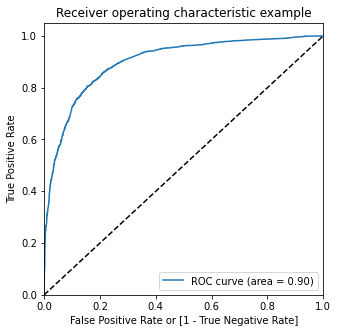

In [130]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [131]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Stu_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.105004,302,0,1,1,0,0,0,0,0,0,0,0
1,0,0.019904,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.154395,1033,0,1,1,0,0,0,0,0,0,0,0
3,0,0.389360,7656,0,1,1,1,1,0,0,0,0,0,0
4,1,0.689638,3241,1,1,1,1,1,1,1,1,0,0,0


In [132]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.674053  0.962109  0.496315
0.2   0.2  0.759862  0.931219  0.654130
0.3   0.3  0.815339  0.858320  0.788818
0.4   0.4  0.830269  0.792834  0.853367
0.5   0.5  0.833412  0.740115  0.890978
0.6   0.6  0.818325  0.643328  0.926302
0.7   0.7  0.803237  0.566310  0.949428
0.8   0.8  0.776678  0.461285  0.971283
0.9   0.9  0.732516  0.317957  0.988310


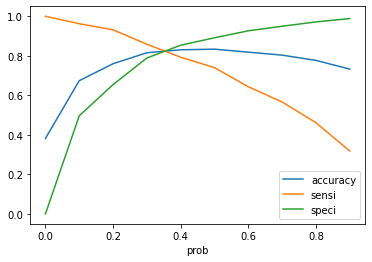

In [133]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [134]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Stu_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.105004,302,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.019904,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.154395,1033,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.389360,7656,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.689638,3241,1,1,1,1,1,1,1,1,0,0,0,1


In [135]:
# Evaluating the overall Accuracy for the model 
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8244538739588244

In [136]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3244,  691],
       [ 426, 2002]], dtype=int64)

In [137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [138]:
# Evaluating the the sensitivity of  model
TP / float(TP+FN)

0.8245469522240527

In [139]:
TN / float(TN+FP)

0.8243964421855147

In [140]:
print(FP/ float(TN+FP))

0.1756035578144854


In [141]:
print (TP / float(TP+FP))

0.7434088377274415


In [142]:
print (TN / float(TN+ FN))

0.8839237057220708


### Recall
TP / TP + FN

In [143]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.807277628032345

In [144]:
from sklearn.metrics import precision_score, recall_score

In [145]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.807277628032345

In [146]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7401153212520593

### Precision and recall tradeoff

In [147]:
from sklearn.metrics import precision_recall_curve

In [148]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    0
 6361    0
 6362    0
 Name: predicted, Length: 6363, dtype: int64)

In [149]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

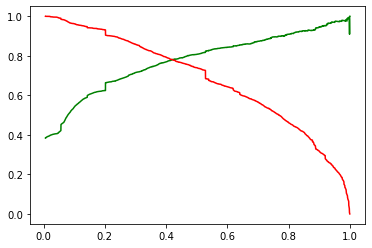

In [150]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  predictions on the test set

In [151]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [152]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_SMS Sent,Last Notable Activity_others
6906,1.919395,0,0,0,0,0,0,0,1,0,1,0,1,0
1873,-0.546142,0,0,0,0,0,0,0,1,0,0,0,0,0
771,-0.797465,0,0,0,0,1,0,0,1,0,0,0,0,0
4495,-0.623190,0,0,0,0,1,0,0,1,0,0,0,0,0
9061,2.392690,0,0,0,0,1,0,0,1,0,0,0,0,0


In [153]:
X_test_sm = sm.add_constant(X_test)

In [154]:
y_test_pred = logm6_model.predict(X_test_sm)

In [155]:
y_test_pred[:10]

6906    0.977612
1873    0.063382
771     0.072635
4495    0.086597
9061    0.720937
4929    0.305457
2308    0.128798
1034    0.045700
9033    0.332580
7008    0.887450
dtype: float64

In [156]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [157]:

y_pred_1.head()

,0
6906,0.977612
1873,0.063382
771,0.072635
4495,0.086597
9061,0.720937


In [158]:
y_test_df = pd.DataFrame(y_test)

In [159]:
y_test_df['Stu_Id'] = y_test_df.index

In [160]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [161]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [162]:
y_pred_final.head()

,Converted,Stu_Id,0
0,1,6906,0.977612
1,0,1873,0.063382
2,0,771,0.072635
3,0,4495,0.086597
4,1,9061,0.720937


In [163]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [164]:
# Rearranging the columns
y_pred_final = y_pred_final.loc[:,['Stu_Id','Converted','Converted_Prob']]

In [165]:
y_pred_final.head()

,Stu_Id,Converted,Converted_Prob
0,6906,1,0.977612
1,1873,0,0.063382
2,771,0,0.072635
3,4495,0,0.086597
4,9061,1,0.720937


In [166]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [167]:
y_pred_final.head()

,Stu_Id,Converted,Converted_Prob,final_predicted
0,6906,1,0.977612,1
1,1873,0,0.063382,0
2,771,0,0.072635,0
3,4495,0,0.086597,0
4,9061,1,0.720937,1


In [168]:
# Calculating the accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8144481114778145

In [169]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1358,  302],
       [ 204,  863]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Calculating the sensitivity 
TP / float(TP+FN)

0.8088097469540768

In [172]:
# Calculating specificity
TN / float(TN+FP)

0.8180722891566266

In [173]:
# Calculating the false postive rate
print(FP/ float(TN+FP))

0.1819277108433735


In [174]:
# Calculating the posstive predictive value 
print (TP / float(TP+FP))

0.7407725321888412


In [175]:
# Calculating the Negative predictive value
print (TN / float(TN+ FN))

0.8693982074263764


#### Precision Score

In [176]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7407725321888412

In [178]:
#RECALL SCORE
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8088097469540768

In [180]:
# Lead Score
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [182]:
y_pred_final.head()

,Stu_Id,Converted,Converted_Prob,final_predicted,Lead_Score
0,6906,1,0.977612,1,98
1,1873,0,0.063382,0,6
2,771,0,0.072635,0,7
3,4495,0,0.086597,0,9
4,9061,1,0.720937,1,72


In [183]:
y_pred_final.head(31)

,Stu_Id,Converted,Converted_Prob,final_predicted,Lead_Score
0,6906,1,0.977612,1,98
1,1873,0,0.063382,0,6
2,771,0,0.072635,0,7
3,4495,0,0.086597,0,9
4,9061,1,0.720937,1,72
5,4929,1,0.305457,0,31
6,2308,0,0.128798,0,13
7,1034,0,0.045700,0,5
8,9033,0,0.332580,0,33
9,7008,1,0.887450,1,89


In [184]:
y_pred_final["Lead_Score"].unique() 

array([ 98,   6,   7,   9,  72,  31,  13,   5,  33,  89,  99,   1,  85,
        20,  30,  62,  79,  12,  11,  53,  52,  49,  92, 100,  94,  34,
        61,  42,  93,  88,  78,  45,  32,  41,  27,  18,  10,  97,  81,
        63,  54,  35,  40,  14,  25,  44,  50,   8,  24,  66,  73,  71,
        84,  23,  36,  91,  82,  77,  57,  86,  67,  74,  16,  56,  75,
        70,  69,  28,  37,  39,  87,  80,  55,  22,  15,   2,   0,   4,
        38,  17,  19,  46,  43,  47,  96,  68,  76,  83,  29,   3,  60,
        51,  26,  90,  64,  58,  21,  95,  59,  48,  65], dtype=int64)

#                  Final RESULT:
###                     >>>>Let us comapre the values obtained for Train & Test:
                     
###               Train Data:
###                     >>>> Accuracy     : 82.44%
###                     >>>> Sensitivity   : 82.45%
###                     >>>> Specificity   : 82.43%
###               Test Data :
###                     >>>> Accuracy     : 81.44%
###                     >>>> Sensitivity   : 80.88%
 ###                   >>>> Specificity   : 81.80%

